<h2>CREDIT CARD FRUAD DETECTION

<h4>Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
#import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

plt.style.use('ggplot')

Using TensorFlow backend.

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
df=data.loc[:, ['Time', 'Amount','Class']] #selecting data of interest

In [7]:
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


<h3>Exploratory Data Analysis

In [8]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [9]:
data.shape

(284807, 31)

In [12]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
df.isna().sum() #No null values present

Time      0
Amount    0
Class     0
dtype: int64

In [14]:
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

<h3>Visualizations

<h4>Univarite Data Analysis

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


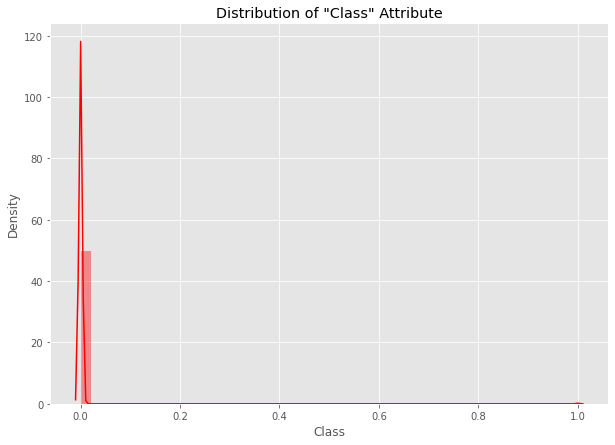

In [15]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['Class'],color='red');

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


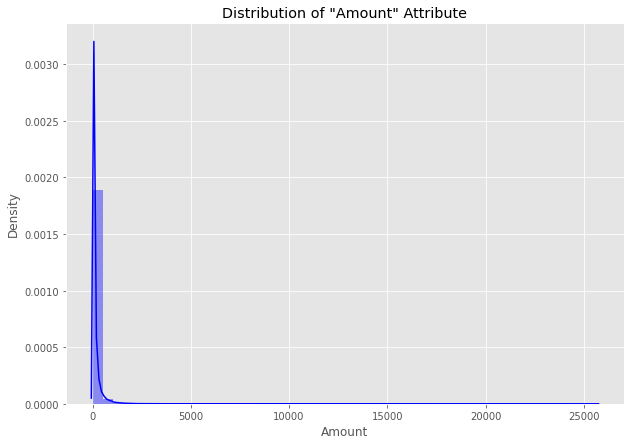

In [16]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Amount" Attribute')

sns.distplot(df['Amount'],color='blue');

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


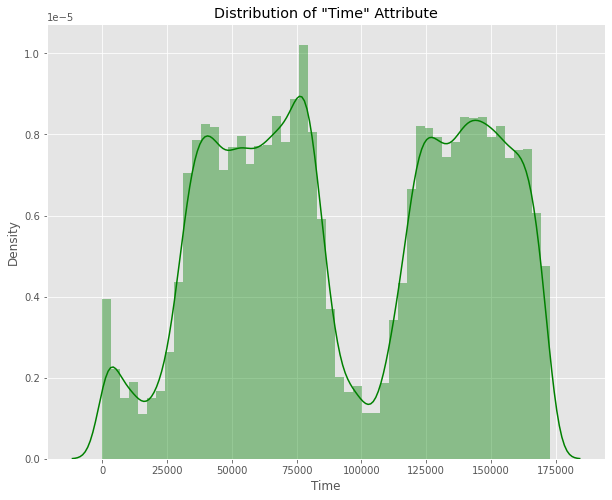

In [17]:
plt.figure(figsize=(10,8))
plt.title('Distribution of "Time" Attribute')

sns.distplot(df['Time'],color='green');

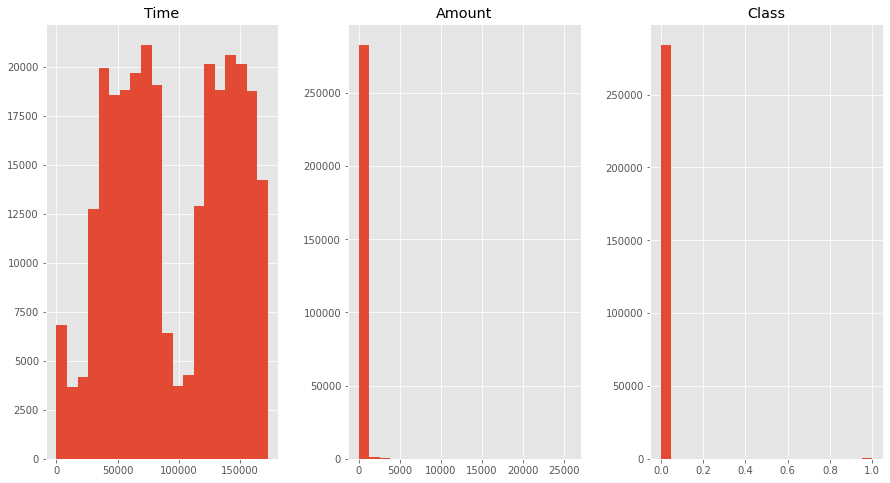

In [21]:
df.hist(bins=20, figsize=(15,8),layout=(1,3)); #Histogram of all the attributes

In [22]:
df.corr() #Correlation among the various attributes

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


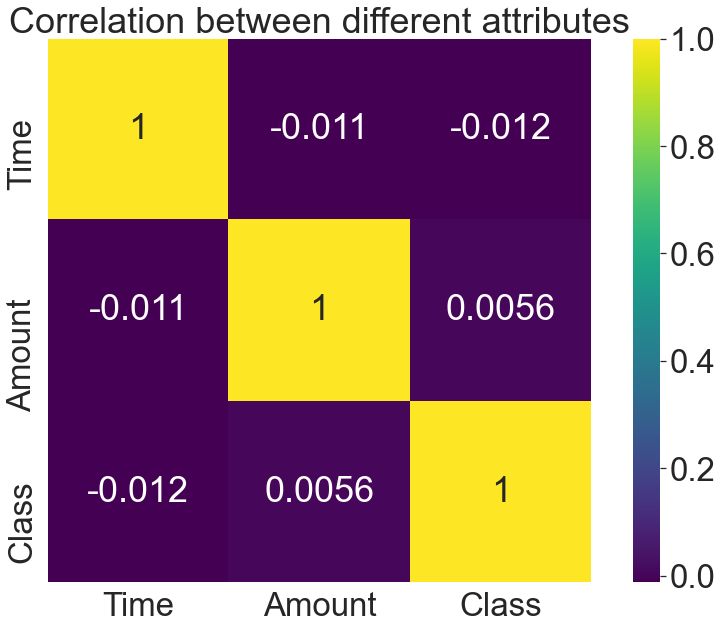

In [24]:
#very low correlation among "Time","Amount" and "Class"

plt.figure(figsize=(15,10))
sns.set(font_scale=3)
sns.heatmap(df.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

Correlation among all the other attributes

In [25]:
data.corr() #very less correlation among the various attributes because of PCA

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


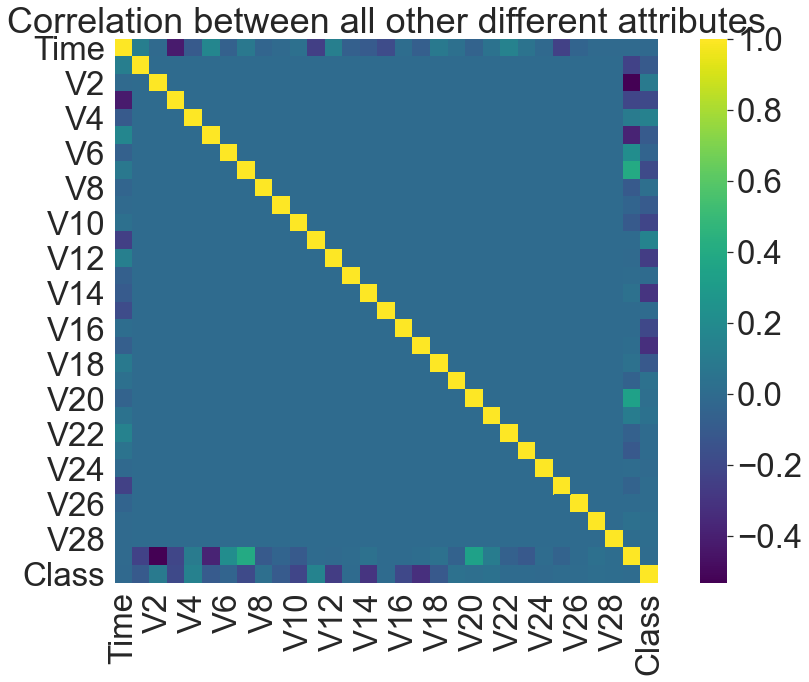

In [26]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(), vmax=1, square=True,cmap='viridis')
plt.title('Correlation between all other different attributes')
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

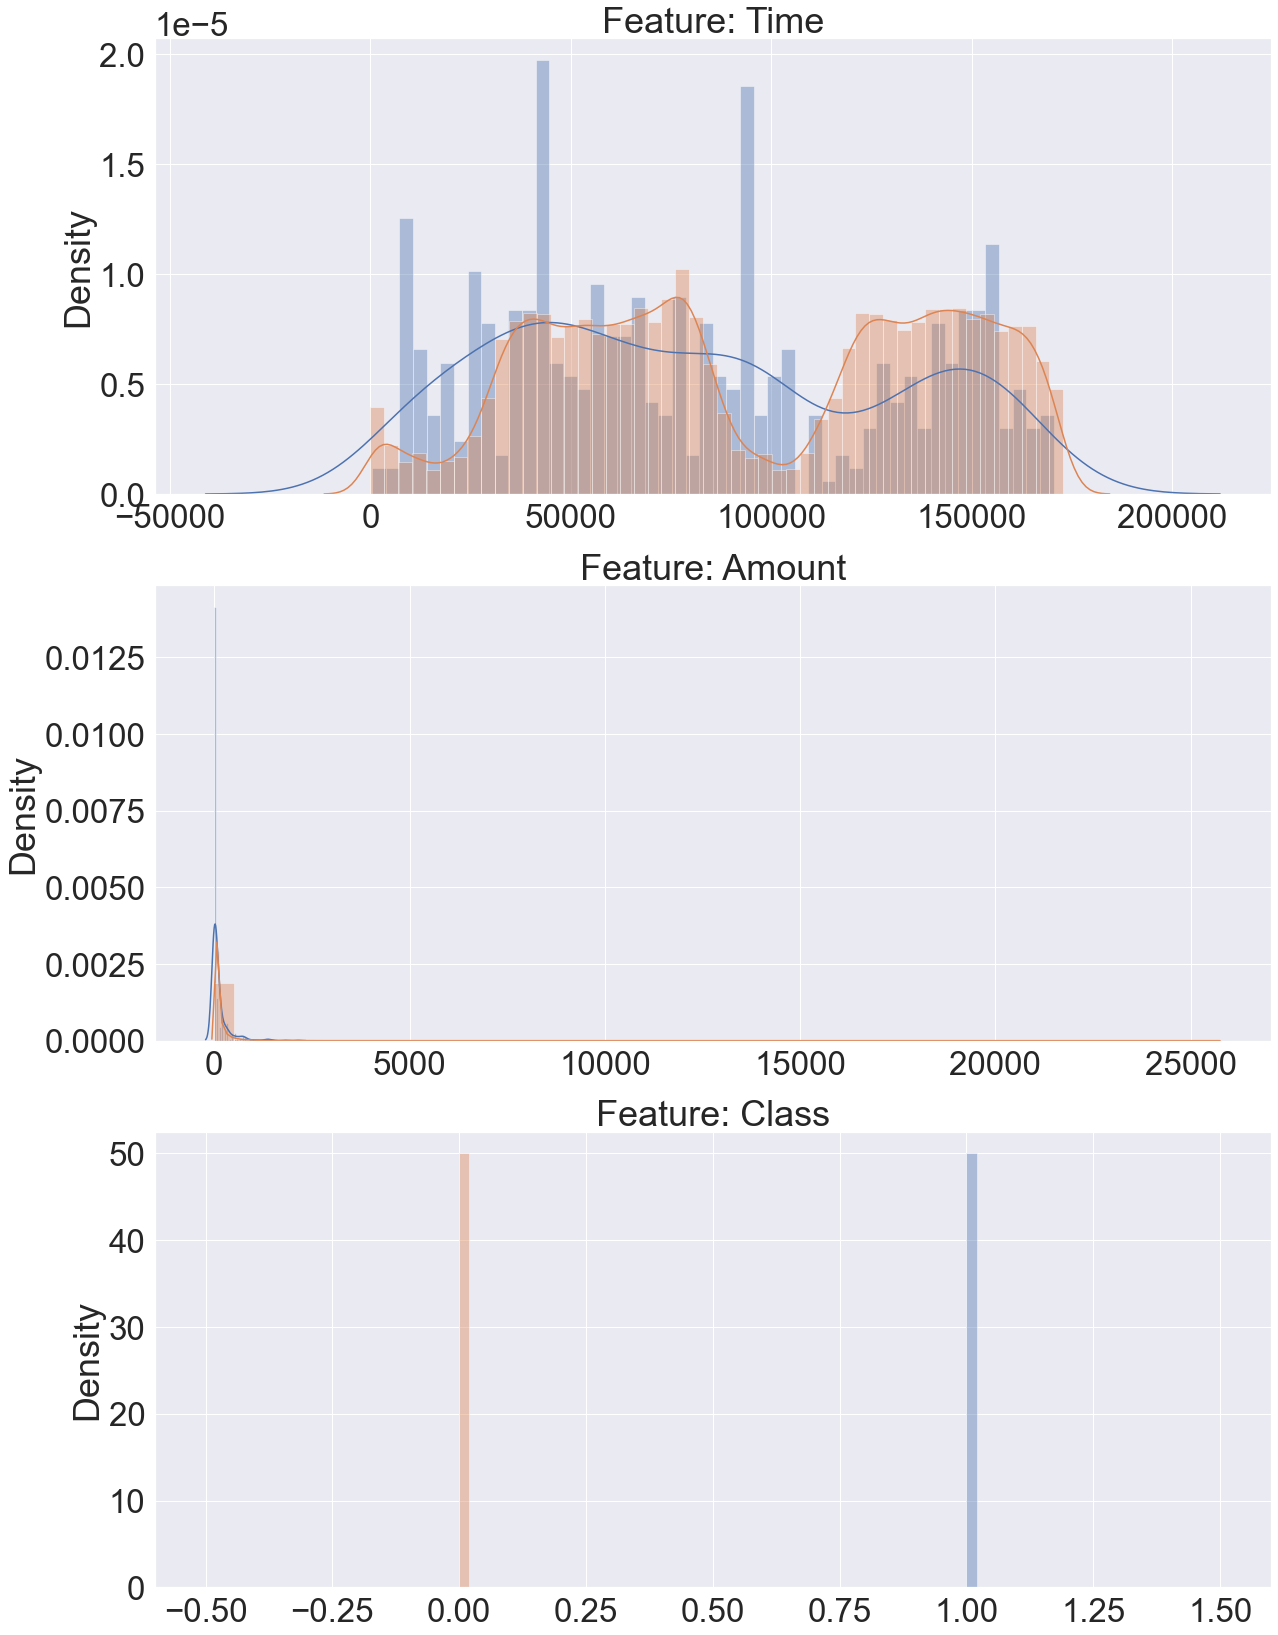

In [28]:
plt.figure(figsize=(20,30*10))
import matplotlib.gridspec as gridspec
features = df.iloc[:,0:30].columns
gs = gridspec.GridSpec(30, 1)
for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature][df.Class == 1], bins=50)
    sns.distplot(df[feature][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

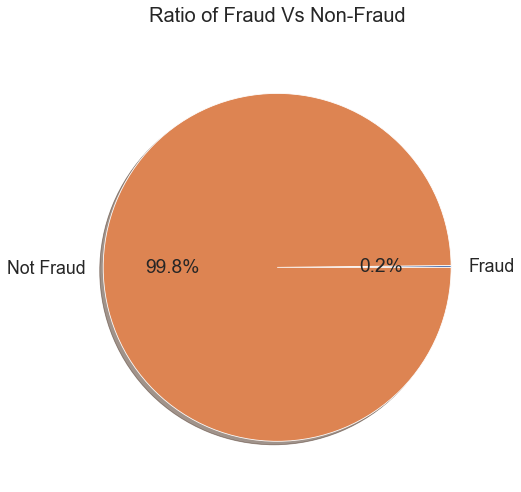

In [30]:
fraud =len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs Non-Fraud\n', fontsize=20)
sns.set_context("paper", font_scale=2)

<h3>Preparing our data for Model Building

In [31]:
# #Separating our data into Dependent and Independent variables

X = data.drop('Class',axis=1)
y = data['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27) # setting up testing and training sets

In [33]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


<h3>Using Dummy Classifier to verify the inbalance data output

In [34]:
from sklearn.dummy import DummyClassifier

In [37]:
# DummyClassifier will end up predicting only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', np.unique(dummy_pred))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9981461194910255


<h4>Upsampling

In [43]:
# separate minority and majority classes
from sklearn.utils import resample

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

0    213245
1    213245
Name: Class, dtype: int64

In [44]:
# trying logistic regression with the balanced dataset

from sklearn.linear_model import LogisticRegression

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [45]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9807589674447347

In [47]:
from sklearn.metrics import classification_report

print('Logistic Regression classification_report')

print('...'*10)

print(classification_report(y_test,upsampled_pred))

Logistic Regression classification_report
..............................
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.87      0.14       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



In [48]:
# confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,69717,1353
1,17,115


<h4>DownSampling

In [50]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

0    360
1    360
Name: Class, dtype: int64

In [51]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [52]:
undersampled_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9758574197354007

In [55]:
from sklearn.metrics import classification_report

print('Logistic Regression classification_report on DownSampling')

print('...'*10)

print(classification_report(y_test,undersampled_pred))

Logistic Regression classification_report on DownSampling
..............................
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.06      0.86      0.12       132

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [56]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,69369,1701
1,18,114


<h4>Generate Synthetic Samples

<h5>SMOTE(SMOTE or Synthetic Minority Oversampling Technique)

In [57]:
from imblearn.over_sampling import SMOTE

In [61]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=27)

In [63]:
smote = LogisticRegression(solver='liblinear').fit(X_train1, y_train1)

smote_pred = smote.predict(X_test1)

# Checking accuracy
accuracy_score(y_test1, smote_pred)

0.9981461194910255

In [64]:
pd.DataFrame(confusion_matrix(y_test1, smote_pred))

,0,1
0,71070,0
1,132,0


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
randf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
randf_pred = randf.predict(X_test)

accuracy_score(y_test, randf_pred)

0.9744529648043594

In [68]:
pd.DataFrame(confusion_matrix(y_test1, randf_pred))

,0,1
0,69264,1806
1,13,119


In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb = GaussianNB()
gnb_best = gnb.fit(X_train, y_train)

In [71]:
# predict on test set
gnb_pred = gnb_best.predict(X_test)

In [73]:
accuracy_score(y_test,gnb_pred)

0.9875284402123535

<h3>GridSearchCV-Support Vector Classifier

In [76]:
# # Run CV with 5 folds (SVM)

C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

In [77]:
# predict on test set
grid_pred = svm_grid.predict(X_test)

In [79]:
accuracy_score(y_test, grid_pred)

0.9465324007752591

<h5>Also consider using RandomizedSearchCV

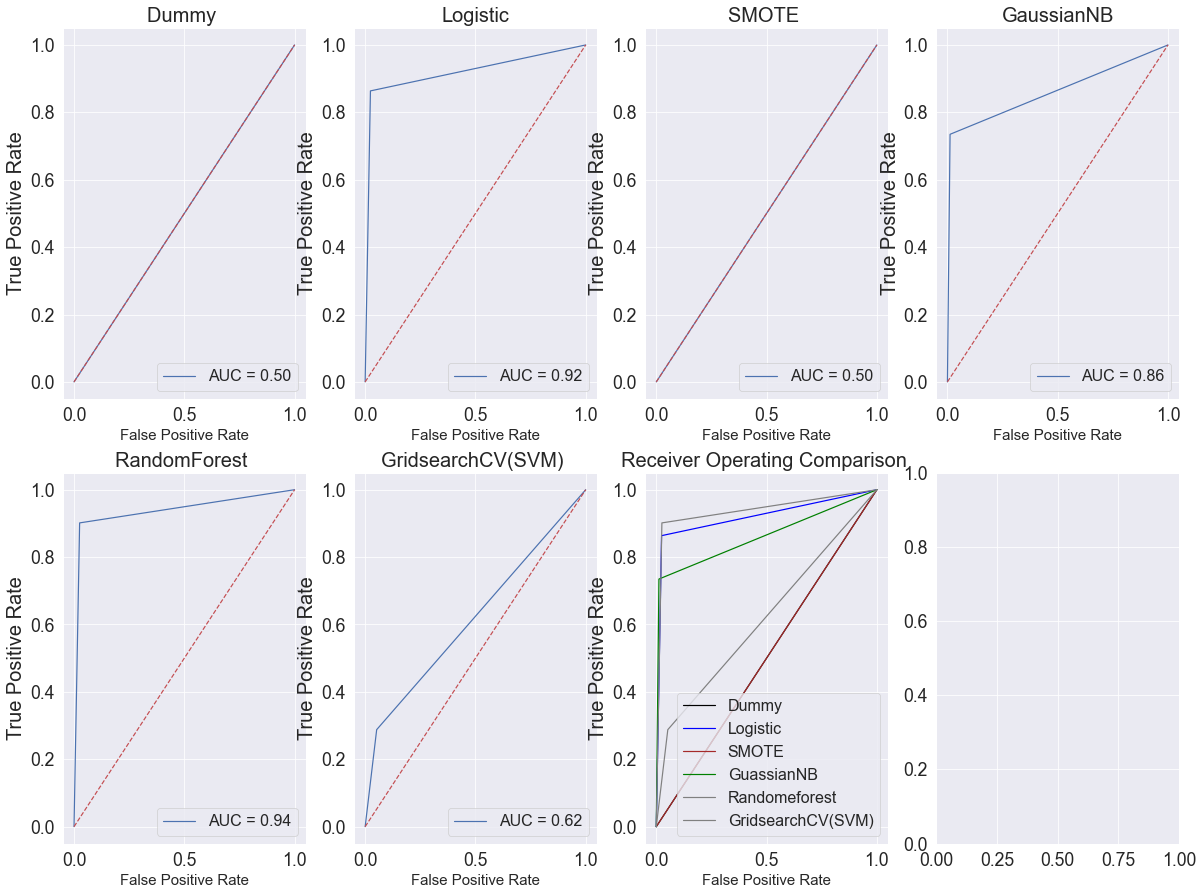

In [82]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (20,15))


#----------Dummy---------


dummy_pred = dummy.predict(X_test)
fprdm, tprdm, thresholddm = metrics.roc_curve(y_test,dummy_pred)
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,  tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Dummy ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#----------Logistics---------

undersampled_pred = undersampled.predict(X_test)
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, undersampled_pred)
roc_aucxgb = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Logistic',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#----------SMOTE---------


smote_pred = smote.predict(X_test1)
#preds = probs[:,1]
fprsm, tprsm, thresholdsm = metrics.roc_curve(y_test, smote_pred)
roc_aucxgb = metrics.auc(fprsm, tprsm)


ax_arr[0,2].plot(fprsm, tprsm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('SMOTE ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})



#----------GaussianNB---------

gnb_pred = gnb_best.predict(X_test)
#preds = probs[:,1]
fprgnb, tprgnb, thresholdgnd = metrics.roc_curve(y_test, gnb_pred)
roc_aucxgb = metrics.auc(fprgnb, tprgnb)


ax_arr[0,3].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0, 1], [0, 1],'r--')
ax_arr[0,3].set_title('GaussianNB',fontsize=20)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,3].legend(loc = 'lower right', prop={'size': 16})


#----------Random Forest---------


randf_pred = randf.predict(X_test)
#preds = probs[:,1]
fprfst, tprfst, thresholdfst = metrics.roc_curve(y_test, randf_pred)
roc_aucxgb = metrics.auc(fprfst, tprfst)


ax_arr[1,0].plot(fprfst, tprfst, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('RandomForest ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#----------GridsearchCV(SVM)---------


grid_pred = svm_grid.predict(X_test)
fprgsv, tprgsv, thresholdgsv = metrics.roc_curve(y_test, grid_pred )
roc_aucxgb = metrics.auc(fprgsv,  tprgsv)


ax_arr[1,1].plot(fprgsv,  tprgsv, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('GridsearchCV(SVM) ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#----------ALL---------


ax_arr[1,2].plot(fprdm, tprdm, 'b', label = 'Dummy', color='black')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='blue')
ax_arr[1,2].plot(fprsm, tprsm, 'b', label = 'SMOTE', color='brown')
ax_arr[1,2].plot(fprgnb, tprgnb, 'b', label = 'GuassianNB', color='green')
ax_arr[1,2].plot(fprfst, tprfst, 'b', label = 'Randomeforest', color='grey')
ax_arr[1,2].plot(fprgsv,  tprgsv, 'b', label = 'GridsearchCV(SVM)', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

<h3> Scaling Amount and Time

In [83]:
from scipy.stats import zscore

In [84]:
data1 = pd.read_csv('creditcard.csv')

In [85]:
X1 = data1.drop('Class',axis=1)
y1 = data1['Class']

In [87]:
ScaledA_T = X1[['Time','Amount']].apply(zscore) 

In [88]:
type(ScaledA_T)

pandas.core.frame.DataFrame

In [89]:
data1.drop(['Amount', 'Time'], axis=1, inplace=True)

In [91]:
data1.head

<bound method NDFrame.head of                V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.

In [93]:
data2= pd.concat([data1,ScaledA_T],axis=1)

In [94]:
data2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


In [98]:
Xx = data2.drop('Class',axis=1)
yy = data2['Class']

In [99]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.25, random_state=27) # setting up testing and training sets

In [100]:
# concatenate our training data back together
X2 = pd.concat([Xx_train, yy_train], axis=1)
X2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
264873,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,-0.343885,...,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,1.407093,-0.342275,0
163821,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,0.443750,...,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,0.451127,-0.199543,0
72083,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,-0.113006,...,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,-0.847726,-0.349231,0
196949,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,0.334537,...,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,0.778241,-0.201742,0
126213,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,0.754427,...,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,-0.354928,0.594317,0


In [101]:
from sklearn.dummy import DummyClassifier

In [102]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(Xx_train, yy_train)
dummy_pred = dummy.predict(Xx_test)

# checking unique labels
print('Unique predicted labels: ', np.unique(dummy_pred))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9981461194910255


In [104]:
#upsampling

In [105]:
# separate minority and majority classes
not_fraud1 = X2[X2.Class==0]
fraud1 = X2[X2.Class==1]

# upsample minority
fraud_upsampled1 = resample(fraud1,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud1), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled1 = pd.concat([not_fraud1, fraud_upsampled1])

# check new class counts
upsampled1.Class.value_counts()

0    213245
1    213245
Name: Class, dtype: int64

In [106]:
# trying logistic regression with the balanced dataset

from sklearn.linear_model import LogisticRegression

C_train = upsampled1.Class
noC_train = upsampled1.drop('Class', axis=1)

upsampled2 = LogisticRegression(solver='liblinear').fit(noC_train, C_train)

upsampled_pred1 = upsampled2.predict(X_test)

In [107]:
# Checking accuracy
accuracy_score(yy_test, upsampled_pred1)

0.001853880508974467

In [108]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled1 = resample(not_fraud1,
                                replace = False, # sample without replacement
                                n_samples = len(fraud1), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled1 = pd.concat([not_fraud_downsampled1, fraud1])

# checking counts
downsampled1.Class.value_counts()

0    360
1    360
Name: Class, dtype: int64

In [112]:
# trying logistic regression again with the undersampled dataset

y12_train = downsampled.Class
X12_train = downsampled.drop('Class', axis=1)

undersampled1 = LogisticRegression(solver='liblinear').fit(X12_train, y12_train)

undersampled_pred1 = undersampled1.predict(Xx_test)

In [114]:
undersampled_pred1

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [115]:
# Checking accuracy
accuracy_score(yy_test, undersampled_pred1)

0.5428639644953793

In [ ]:
s